Dataset Download Link: \
train set: https://pjreddie.com/media/files/mnist_train.csv \
test set: https://pjreddie.com/media/files/mnist_test.csv

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train = np.genfromtxt('mnist_train.csv', delimiter=',')
test = np.genfromtxt('mnist_test.csv', delimiter=',')

In [5]:
train.shape

(60000, 785)

In [3]:
x_train = train[:,1:].reshape((60000, 28, 28))
x_test = test[:,1:].reshape((10000, 28, 28))

y_train = train[:,0]
y_test = test[:,0]

In [11]:
image = x_train[np.random.randint(0, x_train.shape[0]),:]

In [12]:
image.shape

(28, 28)

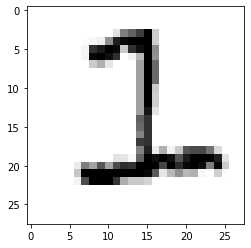

In [21]:
plt.imshow(x_train[np.random.randint(0, x_train.shape[0]),:], cmap='gray_r')

In [23]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

x_train = x_train/255
x_test = x_test/255

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, Input

In [31]:
model = Sequential()

model.add(Input(shape=(28,28, 1)))

model.add(Conv2D(filters=8, kernel_size=(3,3)))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(16, kernel_size=(3,3)))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(32))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history_simple = model.fit(x_train, y_train_cat, epochs=10, validation_data=(x_test, y_test_cat))

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1870/1875 [============================>.] - ETA: 0s - loss: 0.4759 - accuracy: 0.8534WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f0a73981d08> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

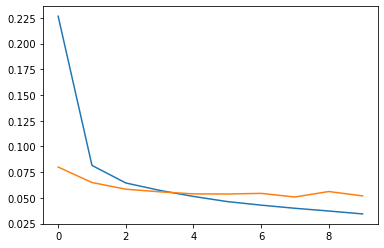

In [53]:
plt.plot(history_simple.history['loss'])
plt.plot(history_simple.history['val_loss'])

In [23]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.1497 - accuracy: 0.9562


[0.14968988299369812, 0.9562000036239624]

(4, 0.9999901)

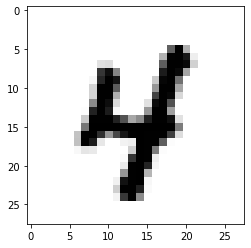

In [52]:
image = x_train[np.random.randint(0, x_train.shape[0]),:]
plt.imshow(image, cmap='gray_r')
pred = model.predict(np.expand_dims(image, 0))
np.argmax(pred), pred[0,np.argmax(pred)]

In [27]:
pred = model.predict_classes(x_test)

/home/mkh/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [28]:
from sklearn.metrics import classification_report

In [29]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       980
         1.0       0.97      0.98      0.98      1135
         2.0       0.96      0.94      0.95      1032
         3.0       0.96      0.95      0.95      1010
         4.0       0.96      0.94      0.95       982
         5.0       0.95      0.96      0.96       892
         6.0       0.96      0.97      0.97       958
         7.0       0.97      0.94      0.95      1028
         8.0       0.91      0.96      0.93       974
         9.0       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



# With Dropout

In [30]:
model = Sequential()

model.add(Input(shape=(28,28, 1)))

model.add(Conv2D(filters=8, kernel_size=(3,3)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(16, kernel_size=(3,3)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(32))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history_dorp = model.fit(x_train, y_train_cat, epochs=2, validation_data=(x_test, y_test_cat))

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - ETA: 0s - loss: 1.2238 - accuracy: 0.5742WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f615160e9d8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

In [32]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.1772 - accuracy: 0.9470


[0.17722120881080627, 0.9470000267028809]

In [33]:
pred = model.predict_classes(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/home/mkh/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [34]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97       980
         1.0       0.98      0.99      0.98      1135
         2.0       0.95      0.93      0.94      1032
         3.0       0.93      0.95      0.94      1010
         4.0       0.97      0.92      0.94       982
         5.0       0.96      0.92      0.94       892
         6.0       0.95      0.97      0.96       958
         7.0       0.95      0.92      0.94      1028
         8.0       0.94      0.93      0.93       974
         9.0       0.88      0.95      0.91      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



# 0.5 Dropout

In [54]:
model = Sequential()

model.add(Input(shape=(28,28, 1)))

model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(16, kernel_size=(3,3), input_shape=(28, 28, 1)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(32))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
history_drop5 = model.fit(x_train, y_train_cat, epochs=2, validation_data=(x_test, y_test_cat))

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1873/1875 [============================>.] - ETA: 0s - loss: 0.8199 - accuracy: 0.7339WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f0a260b9ae8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) a

In [37]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.2519 - accuracy: 0.9267


[0.2518653869628906, 0.9266999959945679]

In [38]:
pred = model.predict_classes(x_test)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/home/mkh/anaconda3/envs/py37/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96       980
         1.0       0.92      0.98      0.95      1135
         2.0       0.94      0.90      0.92      1032
         3.0       0.94      0.89      0.92      1010
         4.0       0.91      0.94      0.93       982
         5.0       0.90      0.92      0.91       892
         6.0       0.95      0.94      0.95       958
         7.0       0.94      0.90      0.92      1028
         8.0       0.93      0.89      0.91       974
         9.0       0.89      0.91      0.90      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



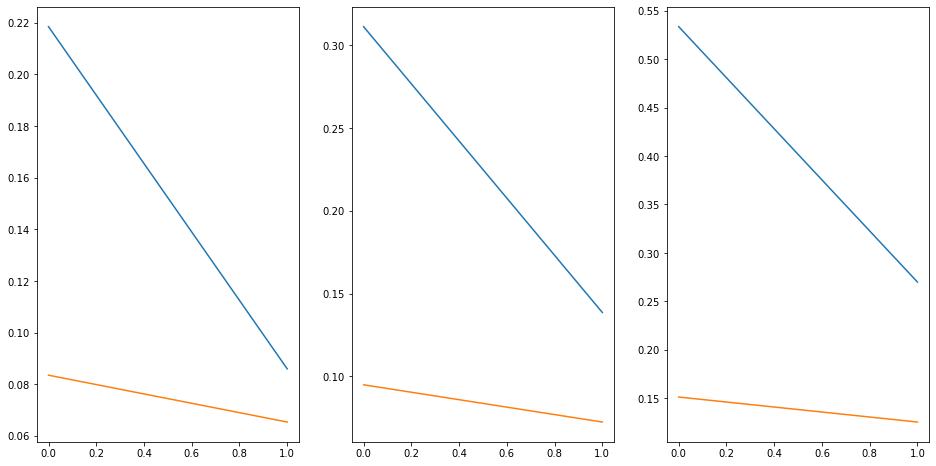

In [152]:
plt.figure(figsize=(16,8))

plt.subplot(131)
plt.plot(history_simple.history['loss'])
plt.plot(history_simple.history['val_loss'])

plt.subplot(132)
plt.plot(history_dorp.history['loss'])
plt.plot(history_dorp.history['val_loss'])

plt.subplot(133)
plt.plot(history_drop5.history['loss'])
plt.plot(history_drop5.history['val_loss'])

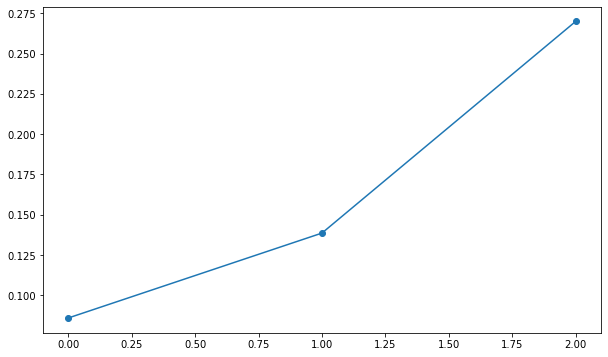

In [161]:
plt.figure(figsize=(10,6))
plt.plot([history_simple.history['loss'][1],history_dorp.history['loss'][1],history_drop5.history['loss'][1]], 'o-')